Alexander Hyde<br>
Phys 434 AB<br>
Partner: Max Wang<br>
# Lab 2

In this lab, I'll take a look at what effect convolutions have on probability distributions, and the effect that taking multiple measurements has on a signal's strength.

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Problem 1

A Fermi telescope is looking for gamma ray sources, but also ends up seeing a background of cosmic rays that produce noise in its signal. Every day, the telescope picks up an average of 8 cosmic rays, while also reading an average of 15 gamma rays as well.<br>

Here's a plot of a pdf for the cosmic background **read over one day**, which ends up being a Poisson distribution. The x-axis is how many cosmic rays were measured in a day, and the y-axis is the probability of reading that number of rays in a day.

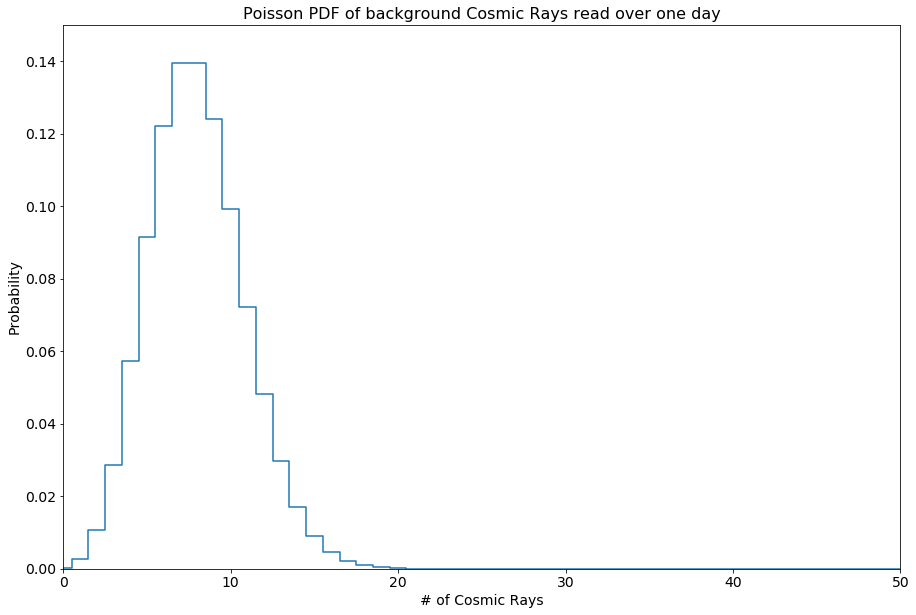

In [6]:
x = np.linspace(0,50,51)
p = stats.poisson.pmf(x,8)

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1, 1)
plt.xlim([0,50])
plt.ylim([0,0.15])
plt.tick_params(labelsize = 14)
plt.xlabel("# of Cosmic Rays",fontsize=14)
plt.ylabel("Probability",fontsize=14)
plt.title("Poisson PDF of background Cosmic Rays read over one day",fontsize=16)
plt.step(x,p,where="mid")
plt.show()

For the rest of these cosmic ray pdfs, the x and y axes have the same meaning.

**A.** Now, what happens if I instead want to know the pdf for the number of cosmic rays I read over multiple days? This requires taking a convolution of the 1-day-pdf with itself for each extra day that I want to add measurements for. Here're the pdf's for the number of cosmic rays measured over multiple days:

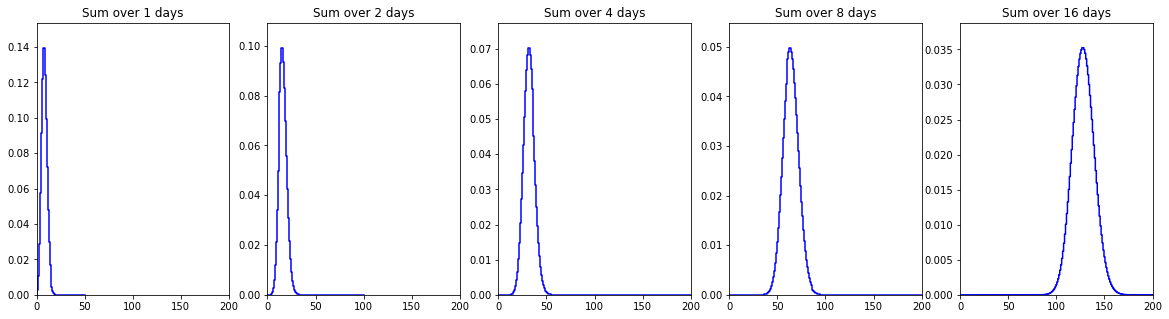

In [17]:
def convPoisson(n,avg): # avg = 0 for sum, avg = 1 for average
    x = np.linspace(0,50,51)
    p = stats.poisson.pmf(x,8)
    P = p
    for i in range(0,n-1):
        P = np.convolve(P,p)
    
    if avg == 0:
        x = np.linspace(0,50*n,len(P))
    elif avg == 1:
        x = np.linspace(0,50,len(P))
    plt.ylim([0,1.1*max(P)])
    plt.step(x,P,'b',where="mid")
    return x,P

plt.rcParams["figure.figsize"] = (20,5)
fig, ax = plt.subplots(1, 5)
days = [1,2,4,8,16]
for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.xlim([0,200])
    plt.title("Sum over " + str(days[i]) + " days")
    convPoisson(days[i],0)
plt.show()

I plotted these over the same x limits to clearly show how as you read over more days, the pdf of the total reading over those days gets wider and in this case, moves further along the x-axis, meaning that you're more likely to read more cosmic rays if you spend more days measuring them.

**B.** Now, does the pdf over multiple, let's say 5, days still resemble a Poisson distribution? To determine this, I'll plot out the 5-day-convolution (in a thin, dark line) and then try to fit a Poisson distribution over it (in a thick, red line) by picking a parameter of 40, since each of the 5 days has an average of measuring 8 cosmic rays, so naturally I'd expect an average of 40 cosmic rays over 5 days.

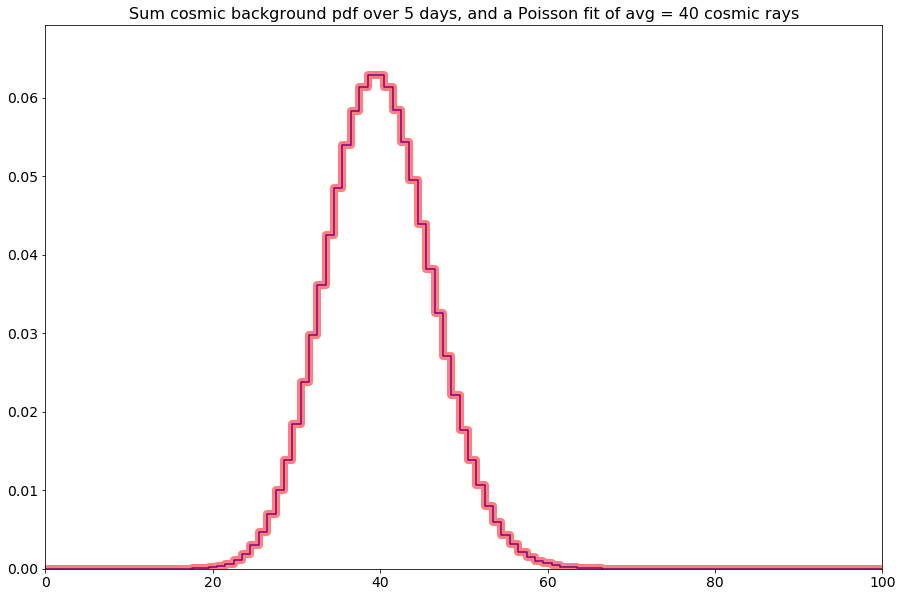

In [16]:
plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1, 1)
plt.xlim([0,100])
convPoisson(5,0)

x = np.linspace(0,100,101)
P = stats.poisson.pmf(x,40)
plt.step(x,P,'r',where="mid",linewidth=8,alpha=0.5)

plt.tick_params(labelsize = 14)
plt.title("Sum cosmic background pdf over 5 days, and a Poisson fit of avg = 40 cosmic rays",fontsize=16)
plt.show()

As you can see, both the 5-day-convolution and the Poisson fit line up perfectly over each other, which to me, is enough to say that convolving a Poisson distribution will give you a Poisson with a shifted average in return. This makes sense overall, since convoluting a pdf with itself will increase its average if it had a non-zero average and widen its standard deviation, and a Poisson pdf's average and standard deviation are directly proportional (actually equal) to its one parameter.

**C.** What if instead of just summing up the number of cosmic rays measured over multiple days, I averaged them over the days instead? Here I'll plot out what this does to the cosmic background pdf, which is effectively just scaling the x axis (# of cosmic rays) of a pdf summed over n days by $\frac1n$.

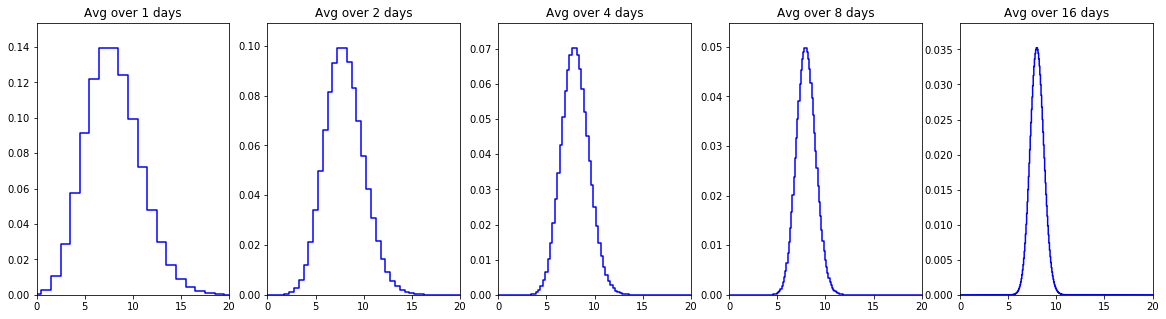

In [19]:
plt.rcParams["figure.figsize"] = (20,5)
fig, ax = plt.subplots(1, 5)
days = [1,2,4,8,16]
for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.xlim([0,20])
    plt.title("Avg over " + str(days[i]) + " days")
    convPoisson(days[i],1)
plt.show()

As I average the cosmic background pdf over more days, the resulting pdf becomes narrower around the mean. Also, the density of points on the pdf becomes larger too since when you average the number of cosmic rays over multiple days, you can end up with non-integer numbers of cosmic rays (for instance, average 3 rays on one day with 6 rays on another, and you get 4.5 rays average). Contrary to just convolving a Poisson with itself, these averaged Poisson convolutions aren't Poisson distributions anymore since their mean stays the same, but their standard deviation visibly gets thinner over more days. The last point I'll make about these averaged convolutions is that they become more Gaussian-like as you average over more days, since you can visibly see that over more days, the pdf's become more symmetric about the mean and more continuous (higher density of points). As you convolve and average these pdf's an infinite amount of times, they'd have an infinite number of points, making them continuous like a Gaussian, and they'd likely be symmetric like a Gaussian; ultimately the pdf would be a Gaussian as explained by the Central Limit Theorem.

**D.** Let's say I've been looking for gamma rays for 8 days, and that I found 120 gamma rays as a result. *What is the probability that a reading of 120 gamma rays or higher over 8 days came from the cosmic background?* I'll calculate this using the 1-day cosmic background pdf convolved with itself over 8 days, I'll also display this probability as a sigma value.

Sigma of finding 120 Gamma rays against the Cosmic background over 8 days: 6.2024291565854845


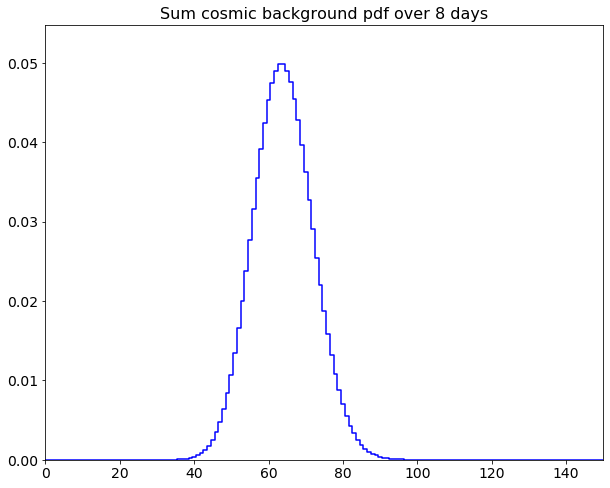

In [41]:
plt.rcParams["figure.figsize"] = (10,8)
fig, ax = plt.subplots(1, 1)
x,cosmP = convPoisson(8,0)
plt.xlim([0,150])
addP = cosmP[:120]
bgProb = sum(cosmP) - sum(addP) # probability that the 120 Gamma rays came from the Cosmic Background
sigma = stats.norm.ppf(1 - bgProb)
print("Sigma of finding 120 Gamma rays against the Cosmic background over 8 days: " + str(sigma))

plt.tick_params(labelsize = 14)
plt.title("Sum cosmic background pdf over 8 days",fontsize=16)
plt.show()

# Problem 2

Let's look at a continuous pdf now instead, here I'll be using the Rayleigh.<br>

**A.** The first thing I want to know is what happens to the Rayleigh pdf as you average it over multiple measurement intervals.

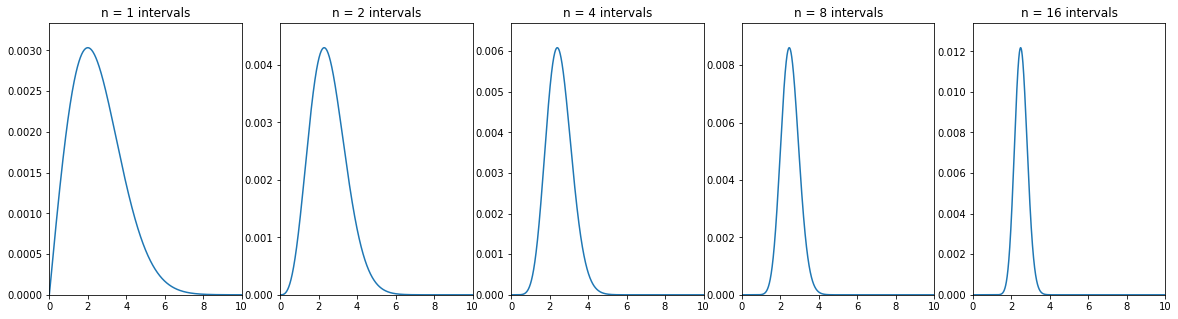

In [37]:
def convRayleigh(n):
    x = np.linspace(0,10,1001)
    p = stats.rayleigh.pdf(x,0,2)
    P = p
    for i in range(0,n-1):
        P = np.convolve(P,p)
    x = np.linspace(0,10,len(P))
    P = n * P / sum(P) # Here I multiply P by n to have a normalized curve (not necessarily normalized when adding points).
    plt.xlim([0,10])
    plt.ylim([0,1.1*max(P)])
    return x,P

plt.rcParams["figure.figsize"] = (20,5)
fig, ax = plt.subplots(1, 5)
points = [1,2,4,8,16]
for i in range(0,5):
    plt.subplot(1,5,i+1)
    x,P = convRayleigh(points[i])
    plt.title("n = " + str(points[i]) + " intervals")
    plt.plot(x,P)
plt.show()

**B.** At the n = 1 interval, note how the pdf at x = 0 faces concave downwards (pdf'' is negative). This changes immediately with a second interval n = 2, which gives the pdf a more bell-like shape. And of course when you average over more measurement intervals, you end up with a pdf more focused around its mean. Nothing indicates however that any of these plots are exactly a Gaussian, since the n = 2 and n = 4 plots are still visibly asymmetric about its mean. This indicates to me that the convolving and averaging process only gradually turns a pdf into a Gaussian, it'll only fully be a Gaussian after an infinite amount of average convolutions.

# Problem 3

Now I'll examine two situations where I'm trying to measure the infra-red counterpart signal of a Neutron star merger's gravitational wave signal. Here my equipment is an optical telescope with a CCD readout. The catch is that my CCD has a universal thermal background noise that for each pixel, resembling a zero-mean (due to flat-fielding) normal distribution such that the x-axis is the brightness of the pixel and the y-axis is the probability density of reading that brightness.

## Version 1

In the first situation, LIGO reports a gravitational wave reading first, then NASA's SWIFT satellite reports the position of it precisely within one pixel of my own telescope's CCD. I also know that the thermal background noise's Gaussian width is 4 units (of brightness). Upon taking a measurement in SWIFT's specified pixel, I found a brightness of 20.5 units.

**A.** *Here I want to know, what is the probability that a measurement of 20.5 units or higher in one pixel is a result of the thermal background noise?* I'll report this probability as a sigma value.

In [6]:
def trialGaussian(n):
    x = np.linspace(-40,40,801)
    P = stats.norm.pdf(x,0,4)
    P = n * P / sum(P)
    return x,P

x,P = trialGaussian(1)
prob = sum(P) - sum(P[:605]) # x[605] = 20.5, the brightness of my signal
sigma = stats.norm.ppf(1 - prob,0,1)
print("Sigma of a single pixel with 20 brightness = " + str(sigma))

Sigma of a single pixel with 20 brightness = 5.112633127369755


Traditionally, a sigma of 5 or higher is worthy of being called a discovery, so measuring a brightness of 20.5 units or higher is a good find.<br>

## Version 2

In the second situation, LIGO still reports that gravitational wave reading, but there's no SWIFT report anymore. In other words, I took a 100x100 pixel image of the sky, but I don't know which pixel out of the 10k there are to look at.<br>

**B.** *Considering that there're 10k pixel measurements in one image, what does the collective thermal background noise look like?*

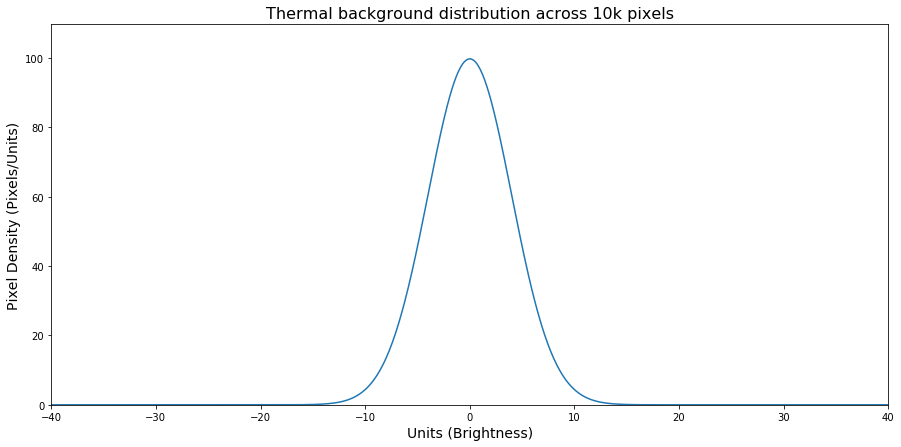

In [42]:
plt.rcParams["figure.figsize"] = (15,7)
fig, ax = plt.subplots(1,1)
x,P = trialGaussian(10000)
plt.xlim([-40,40])
plt.ylim([0,1.1*max(P)])
plt.xlabel("Units (Brightness)",fontsize=14)
plt.ylabel("Pixel Density (Pixels/Units)",fontsize=14)
plt.title("Thermal background distribution across 10k pixels",fontsize=16)
plt.plot(x,P)
plt.show()

Note that the y-axis is pixel density in this case. When you integrate the pdf, you now get a number of pixels.<br>

**C.** In my photo, my brightest pixel read 20.5 units. *What's the probability that a single pixel among 10k pixels' reading of 20.5 units of brightness or higher came from the thermal background noise?*

In [7]:
pixC = (1 - stats.norm.cdf(20.5,0,4))*10000
print("Pixels with brightness 20 or above = " + str(pixC))
sigma = stats.norm.ppf(1 - pixC,0,1)
print("Sigma of 20 brightness pixel = " + str(sigma))

Pixels with brightness 20 or above = 0.0014876887322046173
Sigma of 20 brightness pixel = 2.970270379659667


The sigma of getting a pixel among 10k of them to read 20 units or higher has dropped considerably down to 2.970 sigma, which is definitely not worthy of being a discovery.

# Problem 4

Let's analyze the last problem's statistics further. Here I'll be looking at how much of an impact the number of pixels (generally speaking, trials) has on a single measurement's strength.<br>

**A.** *What brightness do you need to read from 1 pixel in a 1 pixel thermal background to achieve a 5 Sigma signal?*<br>
**B.** *For 1 pixel in a 10k pixel thermal background?*

In [45]:
sigProb = 1 - stats.norm.cdf(5,0,1)

invX1 = stats.norm.ppf(1 - sigProb,0,4)
print("1 out of 1 Pixel signal brightness required for 5 Sigma = " + str(invX1))

invX10k = stats.norm.ppf(1 - sigProb/10000,0,4)
print("1 out of 10k Pixel signal brightness required for 5 Sigma = " + str(invX10k))

1 out of 1 Pixel signal brightness required for 5 Sigma = 19.999999999880703
1 out of 10k Pixel signal brightness required for 5 Sigma = 26.20214994756662


**C.** The ratio of the 1 out of 10k to the 1 out of 1 pixel brightness for a 5 Sigma reading is 1.310, I'll call this ratio the Trial Factor, and the denominator of which will always be the 1 out of 1 pixel brightness. Thinking about it, only going from 20 units to 26.2 units to maintain the same signal strength between 1 trial and 10k trials is surprisingly small. My reasoning for this being such a relatively small change is that the pdf's are Normal distributions, Gaussian functions like $ae^{-bx^2}$. Since the Gaussian falls off faster than standard exponential decay, multiplying its height by the number of trials would only make a significant difference if the number of trials is at least exponentially large.<br>

**D.** Here I'll demonstrate 5 Sigma trial factors for different numbers of trials in a plot. These trial factors are still being taken in the case of the zero-mean Gaussian with a width of 4.

10^0 Trials, Trial Factor = 1.0
10^1 Trials, Trial Factor = 1.085386800680112
10^2 Trials, Trial Factor = 1.1648729092269157
10^3 Trials, Trial Factor = 1.2395201624554713
10^4 Trials, Trial Factor = 1.3101074973861455
10^5 Trials, Trial Factor = 1.3772264506042249
10^6 Trials, Trial Factor = 1.441336287067132
10^7 Trials, Trial Factor = 1.5028274278930729
10^8 Trials, Trial Factor = 1.5617614993929536
10^9 Trials, Trial Factor = 1.6153142008356598


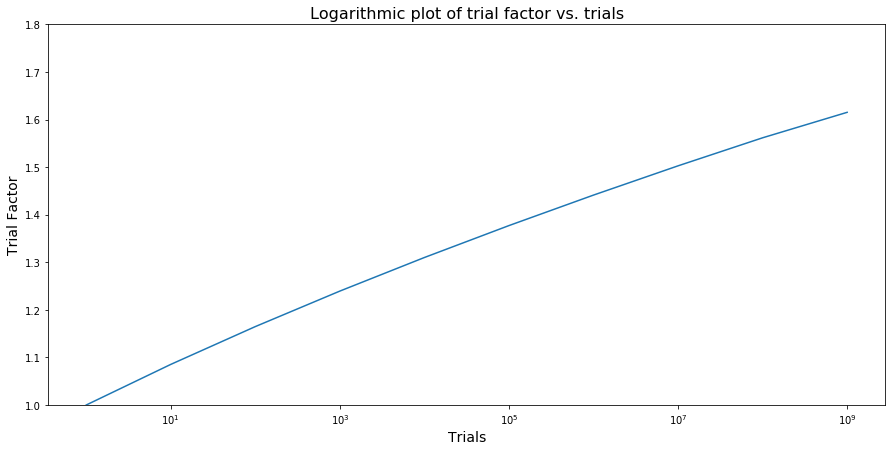

In [52]:
sigProb = 1 - stats.norm.cdf(5,0,1)
invX1 = stats.norm.ppf(1 - sigProb,0,4)
t = np.zeros(10)
tF = np.zeros(10)
for i in range(0,10):
    t[i] = 10**i
    invX = stats.norm.ppf(1 - sigProb/t[i],0,4)
    tF[i] = invX/invX1
    print("10^" + str(i) + " Trials, Trial Factor = " + str(tF[i]))

plt.rcParams["figure.figsize"] = (15,7)
fig, ax = plt.subplots(1,1)
plt.ylim([1,1.8])
plt.xscale("log")
plt.xlabel("Trials",fontsize=14)
plt.ylabel("Trial Factor",fontsize=14)
plt.title("Logarithmic plot of trial factor vs. trials",fontsize=16)
plt.plot(t,tF)
plt.show()

On a logarithmic x scale, the trial factor appears to increase linearly. I would say however this graph is likely a small part of a larger, downwards parabola due to the Gaussian's exponent being proportional to $-x^2$. Ultimately after 1 billion trials, the trial factor ends up being 1.615, which would make the threshold for reading a 5-Sigma worthy brightness go from 20 units up to 32.3 units.